In [1]:
import beamtime_config_2018
# import ROI_Finder_2018
from beamtime_config_2018 import *
# from ROI_Finder_2018 import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import rc
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import seaborn as sns

import xrf_roif_2022

from xrf_roif_2022 import *

import warnings
warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>


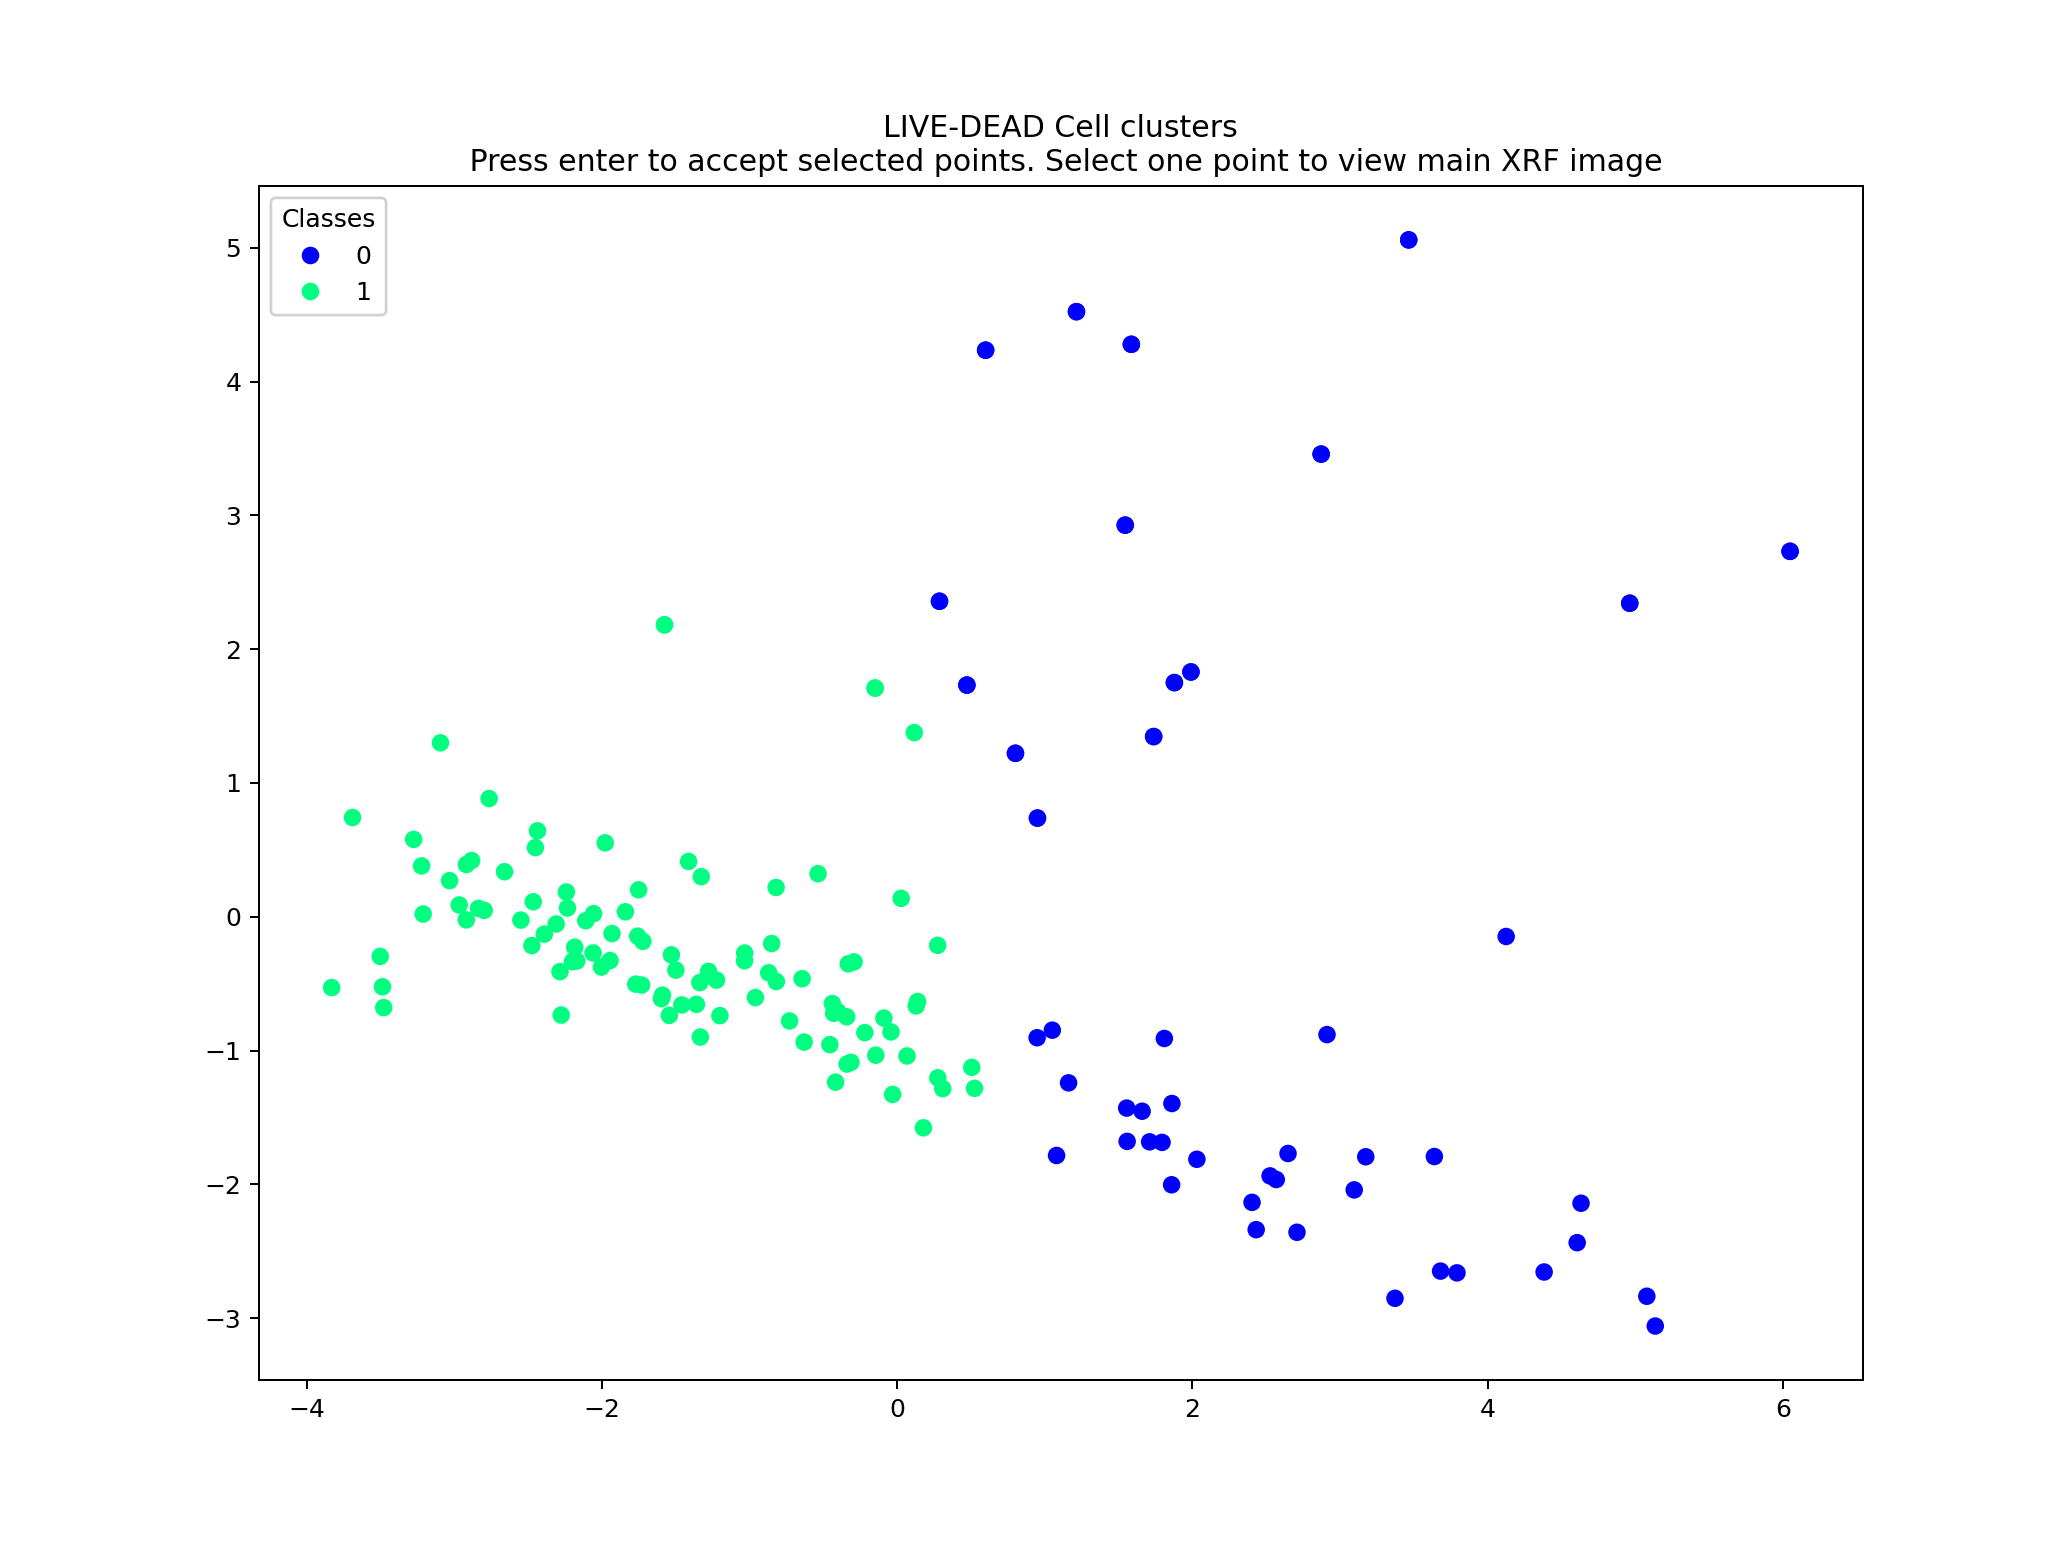

In [3]:
%matplotlib notebook

subplot_kw = dict(autoscale_on=True)
fig, ax = plt.subplots(subplot_kw=subplot_kw)

# pts = ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], marker='x',s=1000,c=secondaryDf.Class, facecolors='black')

pts = ax.scatter(secondaryDf['PC1'].to_numpy(),secondaryDf['PC2'].to_numpy(), c=secondaryDf.Class,
                 cmap='winter')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*pts.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend)

selector = SelectFromCollection(ax, pts)

fig.canvas.mpl_connect("key_press_event", accept)
ax.set_title("LIVE-DEAD Cell clusters\n Press enter to accept selected points. Select one point to view main XRF image")

plt.show()



In [4]:
# return the live and dead cells from the current XRF image only
currentXRF_Df = secondaryDf[secondaryDf['xrf_file']==target_xrf_filename]
# class 0 cells locations
dead_array = currentXRF_Df[currentXRF_Df['Class']==0][['x_motor','y_motor']].to_numpy()
live_array = currentXRF_Df[currentXRF_Df['Class']==1][['x_motor','y_motor']].to_numpy()
print('live cells found:',live_array.size)
print('dead cells found:',dead_array.size)

live cells found: 8
dead cells found: 60


In [ ]:
dead_array[:2]

In [1]:
import beamtime_config_2018
# import ROI_Finder_2018
from beamtime_config_2018 import *
# from ROI_Finder_2018 import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns

import xrf_roif_2022

from xrf_roif_2022 import *

import warnings
warnings.filterwarnings("ignore")

def ROI_Finder(target_base_file_path = 'beamtime_data/',
               target_xrf_filename ='bnp_fly0073.mda.h52', mode='single' ):
    
    '''
    
    Function to train on 7 XRF images (hard coded at local directory in IVY) and on the 8th image detect and return 
    all class 0 and class 1 ecoli cells based on selected mode,
    
    args:
    target_base_file_path: string, path to XRF file directory
    target_xrf_filename:string, name of XRF file
    mode: string, 'single' returns motor coordinates of 1 cell from class 0 and 1 cell from class 1.
                   'all' returns motor coordinates of a cells from class 0 and alls cell from class 1.
                   
                   
    returns: motor_coordinate(s) based on x_res for BNP based on selected mode.               
    '''

    # base_file_path = '/home/beams/USERBNP/arshad/Practice_h5/'

    base_file_path = 'beamtime_data/'

    current_xrf_filename = base_file_path + 'bnp_fly0032.mda.h5'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()

    X_bin1=x.binary_img  
    X_Cu1=x.Patches_Cu
    X_Zn1=x.Patches_Zn
    X_Ca1=x.Patches_Ca
    X_K1=x.Patches_K
    X_P1=x.Patches_P
    X_S1=x.Patches_S
    X_Fe1=x.Patches_Fe
    X_Ni1=x.Patches_Ni
    X_TFY1=x.Patches_TFY

    X_x_res1=x.x_res_list
    X_y_res1=x.y_res_list
    X_avg_res1=x.avg_res_list
    X_x_origin1=x.x_origin_list
    X_y_origin1=x.y_origin_list

    X_x_motor1=x.x_motor_center_list
    X_y_motor1=x.y_motor_center_list


    SNR_X1=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X1=x.features

    X_centers1=x.center_coords
    X_xrf_track_file1=x.XRF_track_files

    print(X1.shape)

    current_xrf_filename = base_file_path + 'bnp_fly0042.mda.h5'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()


    X_bin2=x.binary_img  
    X_Cu2=x.Patches_Cu
    X_Zn2=x.Patches_Zn
    X_Ca2=x.Patches_Ca
    X_K2=x.Patches_K
    X_P2=x.Patches_P
    X_S2=x.Patches_S
    X_Fe2=x.Patches_Fe
    X_Ni2=x.Patches_Ni
    X_TFY2=x.Patches_TFY

    X_x_res2=x.x_res_list
    X_y_res2=x.y_res_list
    X_avg_res2=x.avg_res_list
    X_x_origin2=x.x_origin_list
    X_y_origin2=x.y_origin_list

    X_x_motor2=x.x_motor_center_list
    X_y_motor2=x.y_motor_center_list


    SNR_X2=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X2=x.features

    X_centers2=x.center_coords
    X_xrf_track_file2=x.XRF_track_files

    print(X2.shape)

    current_xrf_filename = base_file_path + 'bnp_fly0043.mda.h5'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()


    X_bin3=x.binary_img  
    X_Cu3=x.Patches_Cu
    X_Zn3=x.Patches_Zn
    X_Ca3=x.Patches_Ca
    X_K3=x.Patches_K
    X_P3=x.Patches_P
    X_S3=x.Patches_S
    X_Fe3=x.Patches_Fe
    X_Ni3=x.Patches_Ni
    X_TFY3=x.Patches_TFY

    X_x_res3=x.x_res_list
    X_y_res3=x.y_res_list
    X_avg_res3=x.avg_res_list
    X_x_origin3=x.x_origin_list
    X_y_origin3=x.y_origin_list

    X_x_motor3=x.x_motor_center_list
    X_y_motor3=x.y_motor_center_list


    SNR_X3=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X3=x.features

    X_centers3=x.center_coords
    X_xrf_track_file3=x.XRF_track_files

    print(X3.shape)



    current_xrf_filename = base_file_path + 'bnp_fly0060.mda.h5'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()

    X_bin4=x.binary_img  
    X_Cu4=x.Patches_Cu
    X_Zn4=x.Patches_Zn
    X_Ca4=x.Patches_Ca
    X_K4=x.Patches_K
    X_P4=x.Patches_P
    X_S4=x.Patches_S
    X_Fe4=x.Patches_Fe
    X_Ni4=x.Patches_Ni
    X_TFY4=x.Patches_TFY

    X_x_res4=x.x_res_list
    X_y_res4=x.y_res_list
    X_avg_res4=x.avg_res_list
    X_x_origin4=x.x_origin_list
    X_y_origin4=x.y_origin_list

    X_x_motor4=x.x_motor_center_list
    X_y_motor4=x.y_motor_center_list


    SNR_X4=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X4=x.features

    X_centers4=x.center_coords
    X_xrf_track_file4=x.XRF_track_files

    print(X4.shape)


    


    current_xrf_filename = base_file_path + 'bnp_fly0065.mda.h5'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()

    X_bin5=x.binary_img  
    X_Cu5=x.Patches_Cu
    X_Zn5=x.Patches_Zn
    X_Ca5=x.Patches_Ca
    X_K5=x.Patches_K
    X_P5=x.Patches_P
    X_S5=x.Patches_S
    X_Fe5=x.Patches_Fe
    X_Ni5=x.Patches_Ni
    X_TFY5=x.Patches_TFY

    X_x_res5=x.x_res_list
    X_y_res5=x.y_res_list
    X_avg_res5=x.avg_res_list
    X_x_origin5=x.x_origin_list
    X_y_origin5=x.y_origin_list

    X_x_motor5=x.x_motor_center_list
    X_y_motor5=x.y_motor_center_list


    SNR_X5=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X5=x.features

    X_centers5=x.center_coords
    X_xrf_track_file5=x.XRF_track_files

    print(X5.shape)


    current_xrf_filename = base_file_path + 'bnp_fly0066.mda.h5'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()

    X_bin6=x.binary_img  
    X_Cu6=x.Patches_Cu
    X_Zn6=x.Patches_Zn
    X_Ca6=x.Patches_Ca
    X_K6=x.Patches_K
    X_P6=x.Patches_P
    X_S6=x.Patches_S
    X_Fe6=x.Patches_Fe
    X_Ni6=x.Patches_Ni
    X_TFY6=x.Patches_TFY

    X_x_res6=x.x_res_list
    X_y_res6=x.y_res_list
    X_avg_res6=x.avg_res_list
    X_x_origin6=x.x_origin_list
    X_y_origin6=x.y_origin_list

    X_x_motor6=x.x_motor_center_list
    X_y_motor6=x.y_motor_center_list


    SNR_X6=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X6=x.features

    X_centers6=x.center_coords
    X_xrf_track_file6=x.XRF_track_files

    print(X6.shape)


    


    current_xrf_filename = base_file_path + 'bnp_fly0073.mda.h52'

    x= beamtime_XRF_image(xrf_filename = current_xrf_filename,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()

    X_bin7=x.binary_img  
    X_Cu7=x.Patches_Cu
    X_Zn7=x.Patches_Zn
    X_Ca7=x.Patches_Ca
    X_K7=x.Patches_K
    X_P7=x.Patches_P
    X_S7=x.Patches_S
    X_Fe7=x.Patches_Fe
    X_Ni7=x.Patches_Ni
    X_TFY7=x.Patches_TFY

    X_x_res7=x.x_res_list
    X_y_res7=x.y_res_list
    X_avg_res7=x.avg_res_list
    X_x_origin7=x.x_origin_list
    X_y_origin7=x.y_origin_list

    X_x_motor7=x.x_motor_center_list
    X_y_motor7=x.y_motor_center_list


    SNR_X7=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X7=x.features

    X_centers7=x.center_coords
    X_xrf_track_file7=x.XRF_track_files

    print(X7.shape)

    #--------target---------


    target_XRF_full_path=target_base_file_path + target_xrf_filename
    
    x= beamtime_XRF_image(xrf_filename = target_XRF_full_path,
                 BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='MAPS')
    # x.add_noise(noise=noise_type)

    x.binary_conversion(e='P')
    x.extract_cells()

    X_bin8=x.binary_img  
    X_Cu8=x.Patches_Cu
    X_Zn8=x.Patches_Zn
    X_Ca8=x.Patches_Ca
    X_K8=x.Patches_K
    X_P8=x.Patches_P
    X_S8=x.Patches_S
    X_Fe8=x.Patches_Fe
    X_Ni8=x.Patches_Ni
    X_TFY8=x.Patches_TFY

    X_x_res8=x.x_res_list
    X_y_res8=x.y_res_list
    X_avg_res8=x.avg_res_list
    X_x_origin8=x.x_origin_list
    X_y_origin8=x.y_origin_list

    X_x_motor8=x.x_motor_center_list
    X_y_motor8=x.y_motor_center_list


    SNR_X8=calc_SNR(x.d_Zn, x.binary_ero_dil)

    X8=x.features

    X_centers8=x.center_coords
    X_xrf_track_file8=x.XRF_track_files

    print('Current XRF:', X8.shape)


    #------------------------

    X=np.concatenate((X1,X2, X3,X4,X5,X6,X7,X8))
    X_bin=np.concatenate((X_bin1,X_bin2, X_bin3,X_bin4,X_bin5,X_bin6,X_bin7,X_bin8))
    X_Cu=np.concatenate((X_Cu1,X_Cu2,X_Cu3,X_Cu4,X_Cu5,X_Cu6,X_Cu7,X_Cu8))
    X_Zn=np.concatenate((X_Zn1,X_Zn2,X_Zn3,X_Zn4,X_Zn5,X_Zn6,X_Zn7,X_Zn8))
    X_Ca=np.concatenate((X_Ca1,X_Ca2,X_Ca3,X_Ca4,X_Ca5,X_Ca6,X_Ca7,X_Ca8))
    X_K=np.concatenate((X_K1,X_K2, X_K3,X_K4,X_K5,X_K6,X_K7,X_K8))
    X_P=np.concatenate((X_P1,X_P2,X_P3,X_P4,X_P5,X_P6,X_P7,X_P8))
    X_S=np.concatenate((X_S1,X_S2,X_S3,X_S4,X_S5,X_S6,X_S7,X_S8))
    X_Fe=np.concatenate((X_Fe1,X_Fe2,X_Fe3,X_Fe4,X_Fe5,X_Fe6,X_Fe7,X_Fe8))
    X_Ni=np.concatenate((X_Ni1,X_Ni2,X_Ni3,X_Ni4,X_Ni5,X_Ni6,X_Ni7,X_Ni8))
    X_TFY=np.concatenate((X_TFY1,X_TFY2,X_TFY3,X_TFY4,X_TFY5,X_TFY6,X_TFY7,X_TFY8))

    X_x_res=np.concatenate((X_x_res1,X_x_res2,X_x_res3,X_x_res4,X_x_res5,X_x_res6,X_x_res7,X_x_res8))
    X_y_res=np.concatenate((X_y_res1,X_y_res2,X_y_res3,X_y_res4,X_y_res5,X_y_res6,X_y_res7,X_y_res8))
    X_avg_res=np.concatenate((X_avg_res1,X_avg_res2,X_avg_res3,X_avg_res4,X_avg_res5,X_avg_res6,X_avg_res7,X_avg_res8))

    X_x_origin=np.concatenate((X_x_origin1,X_x_origin2,X_x_origin3,X_x_origin4,X_x_origin5,X_x_origin6,X_x_origin7,X_x_origin8))
    X_y_origin=np.concatenate((X_y_origin1,X_y_origin2,X_y_origin3,X_y_origin4,X_y_origin5,X_y_origin6,X_y_origin7,X_y_origin8))

    X_x_motor=np.concatenate((X_x_motor1,X_x_motor2,X_x_motor3,X_x_motor4,X_x_motor5,X_x_motor6,X_x_motor7,X_x_motor8))
    X_y_motor=np.concatenate((X_y_motor1,X_y_motor2,X_y_motor3,X_y_motor4,X_y_motor5,X_y_motor6,X_y_motor7,X_y_motor8))



    SNR=np.array([SNR_X1,SNR_X2,SNR_X3,SNR_X4,SNR_X5,SNR_X6,SNR_X7,SNR_X8])
    SNR_Df = pd.DataFrame()
    SNR_Df['SNR']=SNR
    # print(SNR_Df.to_string())

    X_centers=np.concatenate((X_centers1,X_centers2,X_centers3,X_centers4,X_centers5,X_centers6,X_centers7,X_centers8))

    X_xrf_track_files=np.concatenate((X_xrf_track_file1,X_xrf_track_file2,X_xrf_track_file3,X_xrf_track_file4,X_xrf_track_file5,X_xrf_track_file6,X_xrf_track_file7,X_xrf_track_file8))


    print('Total extracted cells, features:', X.shape)
    print('Total extracted cell, cell size:', X_bin.shape)
    #-----------------------------

    BASE_PATCH_WIDTH=x.BASE_PATCH_WIDTH
    principalDf = pd.DataFrame(
                 columns = ['Pixel_count', 'area'])

    principalDf['area'] = X[:,0]
    principalDf['eccentricity'] = X[:,1]
    principalDf['equivalent_diameter'] = X[:,2]
    principalDf['major_axis_length'] = X[:,3]
    principalDf['minor_axis_length'] = X[:,4]
    principalDf['perimeter'] = X[:,5]
    principalDf['K'] = X[:,6]
    principalDf['P'] = X[:,7]
    principalDf['Ca'] = X[:,8]
    principalDf['Zn'] = X[:,9]
    principalDf['Fe'] = X[:,10]
    principalDf['Cu'] = X[:,11]
    principalDf['BFY'] = X[:,12]
    principalDf['Pixel_count'] = X[:,13].astype(int)
    principalDf['x_res'] = X_x_res
    principalDf['y_res'] = X_y_res
    principalDf['avg_res'] = X_avg_res
    principalDf['x_origin'] = X_x_origin
    principalDf['y_origin'] = X_y_origin
    principalDf['x_motor'] = X_x_motor
    principalDf['y_motor'] = X_y_motor
    principalDf['xrf_file']=X_xrf_track_files
    principalDf['xrf_file']=X_xrf_track_files
    secondaryDf=principalDf

    # remove additional artifacts that do not contain 8 pixels, currently set to 3
    secondaryDf=secondaryDf[secondaryDf['Pixel_count'] >8]
    #keep track of the original indices after removing artifacts
    secondaryDf['original index'] = secondaryDf.index.to_numpy()
    secondaryDf.reset_index(drop=True, inplace=True)
    print('Bounding box width and height (pixels):' , BASE_PATCH_WIDTH)


    #-------PCA-kmeans-----------------

    mod_X = np.asarray([
        secondaryDf['area'],secondaryDf['eccentricity'],secondaryDf['equivalent_diameter'],
        secondaryDf['major_axis_length'],secondaryDf['minor_axis_length'],secondaryDf['perimeter'],
        secondaryDf['K'],secondaryDf['P'],secondaryDf['Ca'],secondaryDf['Zn'],secondaryDf['Fe']
                   ]).T

    print('Actual cells, features', mod_X.shape)

    X_standard = StandardScaler().fit_transform(mod_X)
        # print(X_standard[0])

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X_standard)

    #assign PC values to dataframe
    secondaryDf['PC1']=principalComponents[:,0]
    secondaryDf['PC2']=principalComponents[:,1]

    kmeans = KMeans(n_clusters = 2, random_state = 42).fit(secondaryDf[['PC1','PC2']].to_numpy())

    secondaryDf['Class'] = kmeans.labels_

    # return the live and dead cells from the current XRF image only
    currentXRF_Df = secondaryDf[secondaryDf['xrf_file']==target_XRF_full_path]
    # class 0 cells locations
    class_0_array = currentXRF_Df[currentXRF_Df['Class']==0][['x_motor','y_motor']].to_numpy()
    class_1_array = currentXRF_Df[currentXRF_Df['Class']==1][['x_motor','y_motor']].to_numpy()
    
#     display(secondaryDf)
    print('class_0 cells found:',class_0_array[:,0].size)
    print('class_1 cells found:',class_1_array[:,0].size)
    
    print('in scan: ',target_xrf_filename)
    
    if mode == 'auto':
    
        return class_0_array, class_1_array
    
    elif mode == 'single':
        return class_0_array[0], class_1_array[0]
    
    else:
        print('Select mode to be either auto or single. Returning location as mode auto')
        return class_0_array, class_1_array



In [1]:
import roif_to_bnp

from roif_to_bnp import ROI_Finder

ROI_Finder(target_base_file_path = 'beamtime_data/',
               target_xrf_filename ='bnp_fly0032.mda.h5', mode='single')

(32, 14)
(67, 14)
(32, 14)
(11, 14)
(18, 14)
(18, 14)
(19, 14)
Current XRF: (32, 14)
Total extracted cells, features: (229, 14)
Total extracted cell, cell size: (229, 32, 32)
Bounding box width and height (pixels): 32
Actual cells, features (171, 11)
class_0 cells found: 42
class_1 cells found: 10
in scan:  bnp_fly0032.mda.h5


(array([ 175.17437744, -654.56518555]), array([ 135.17437744, -644.81518555]))

In [4]:
b

array([ 135.17437744, -644.81518555])

In [ ]:
#shows selected indices in secondaryDf

print('number of selected cells:', len(selector.ind))

print('modified_indices:', selector.ind)

#conversions to original indices
target_scan_cell_indices = secondaryDf['original index'][selector.ind].to_numpy()
print('original indices:', target_scan_cell_indices)
print('K-means classes \n')
secondaryDf['Class'][selector.ind]

print('cell centers (pixel value in XRF image):' , X_centers[target_scan_cell_indices])
print('\n')
print('cell centers in x (pixel value in XRF image):' , X_centers[target_scan_cell_indices][0])
print('\n')
print('cell x_origins (motor coordinates):' , X_x_origin[target_scan_cell_indices])
print('\n')
print('cell y_origins (motor coordinates):' , X_y_origin[target_scan_cell_indices])

print('\n')
print('send to motor')
print('cell x_center (motor coordinates):' , X_x_motor[target_scan_cell_indices])
print('\n')
print('cell y_center (motor coordinates):' , X_y_motor[target_scan_cell_indices])
print('\n')

print('BBox motor width (x): ', BASE_PATCH_WIDTH*X_x_res[target_scan_cell_indices])
print('BBox motor width (y): ', BASE_PATCH_WIDTH*X_y_res[target_scan_cell_indices])


print('Main XRF image file (selected):' , X_xrf_track_files[target_scan_cell_indices])

motor_coordinates = np.vstack((X_x_motor[target_scan_cell_indices],X_y_motor[target_scan_cell_indices])).T
print(motor_coordinates)
